# 리뷰 텍스트 분석

201701562 송병준

## 리뷰 데이터 끌어오기

어메이징 스파이더맨 2 리뷰를 가져올겁니다.

스크래핑이 끝난 최종 데이터는
```python
[
    ("리뷰텍스트", True),
    ...
]
```
모양이 될 겁니다.

### 스크래핑 대상

네이버 리뷰를 사용할겁니다.

[어메이징 스파이더맨 2 영화 페이지](https://movie.naver.com/movie/bi/mi/point.naver?code=94187#)는 이렇게 생겼습니다.

![](https://user-images.githubusercontent.com/35878712/144754632-551b745f-db16-4583-993c-c06748b3e845.png)

리뷰가 차지하는 면적은 좁습니다. 사실 빨간 네모 부분은 `<iframe>` 속에 들어 있습니다. 해당 부분의 URL은 다음과 같이 생겼습니다:

```
https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=[영화코드]&type=after&page=[페이지]
```

*어메이징 스파이더맨 2*의 영화 코드는 **94187**입니다.

한 페이지에 10개씩 리뷰가 나오니, `page` 쿼리 파라미터를 바꿔 가며 100번만 요청하면 1000개를 확보할 수 있습니다.

### 요청 보내고 응답 받기

urllib을 사용할 겁니다.

### HTML에서 데이터 꺼내기

Beautiful Soup를 사용할 겁니다.

In [54]:
# 유틸리티 모음!

def flatten(t):
    return [item for sublist in t for item in sublist]

In [55]:
from urllib.request import urlopen
from time import sleep
from bs4 import BeautifulSoup


def retrieve_html(page: int) -> str:
    """
    인자로 받은 페이지에 해당하는 영화 리뷰 HTML 텍스트를 가져옵니다
    :param page: 몇 번째 페이지를 가져올 것인가
    :return: 가져온 HTML 텍스트
    """
    url = f"https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=94187&type=after&page={page}"
    html = urlopen(url)
    return html.read()


def extract_reviews(html: str, positive_threshold: int) -> list:
    """
    HTML에서 리뷰를 꺼내옵니다.
    :param html: raw HTML 텍스트
    :param positive_threshold: 긍정 임계치(?). 이거 이상부터 긍정 리뷰로 해석합니다.
    :return: (텍스트, 긍정여부)의 리스트
    """
    reviews = []
    soup = BeautifulSoup(html, "html.parser")

    rows = soup.find("div", {"class": "score_result"}).find_all("li")

    for row in rows:
        stars = int(row.find("div", {"class": "star_score"}).find("em").text)
        text = row.find("div", {"class": "score_reple"}).find("p").find_all("span").pop().text.strip()
        is_positive = stars >= positive_threshold

        reviews.append((text, is_positive))

    return reviews


def fetch_all_reviews(page_range: range) -> list:
    """
    모든 리뷰를 가져옵니다.
    :return: 리뷰의 리스트
    """
    all_reviews = []

    for i in page_range:
        print(f"{page_range}개 페이지 중 {i}번째 페이지 스크랩 중...")
        html = retrieve_html(i)
        reviews = extract_reviews(html, positive_threshold=5)
        all_reviews.extend(reviews)
        sleep(0.2)

    return all_reviews

In [75]:
fetched_reviews = fetch_all_reviews(range(1, 101))
print(f'학습용 데이터 {len(fetched_reviews)}개 확보!')

range(1, 101)개 페이지 중 1번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 2번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 3번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 4번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 5번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 6번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 7번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 8번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 9번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 10번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 11번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 12번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 13번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 14번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 15번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 16번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 17번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 18번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 19번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 20번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 21번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 22번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 23번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 24번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 25번째 페이지 스크랩 중...
range(1, 101)개 페이지 중 26번째 페이지 스크랩 

## 데이터 살펴보기

### 명사만 뽑아내기

`ㅋㅋㅋ`이나 `ㅠㅠ`가 잔뜩 들어간 텍스트에는 `Okt`가 제격이죠. `Okt.nouns`를 쓸 겁니다.

### 워드클라우드 그려보기

긍정 리뷰와 부정 리뷰 각각에서 명사만 뽑아 워드클라우드를 그려 볼 겁니다.

In [57]:
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
from matplotlib import pyplot as plt

okt = Okt()


def extract_nouns_for_word_cloud(text: str) -> list:
    """
    텍스트에서 명사만 추출한 뒤 일정 길이 이하의 단어들은 제거하여 반환합니다.
    :param text: 원본
    :return: 조건에 맞는 명사들
    """
    nouns = okt.nouns(text)

    return [noun for noun in nouns if len(noun) > 1]


def draw_word_cloud(words: list):
    """
    주어진 단어의 리스트로부터 word cloud를 그립니다.
    :param words: 단어들
    :return:
    """
    counter = Counter(words)

    print(counter.most_common())

    # mac OS: '/Library/Fonts/NanumBarunGothic.ttf'
    word_cloud = WordCloud(
        background_color='white',
        max_words=2000,
        font_path=r'/Library/Fonts/NanumBarunGothic.ttf'
    ).generate_from_frequencies(counter)

    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


def draw_word_cloud_from_reviews(reviews: list):
    """
    주어진 리뷰들로부터 word cloud를 그립니다.
    :param reviews: 리뷰들
    :return:
    """
    all_words = flatten([extract_nouns_for_word_cloud(review[0]) for review in reviews])
    draw_word_cloud(all_words)


[('스파이더맨', 188), ('영화', 155), ('예고편', 120), ('액션', 98), ('스토리', 66), ('어메이징', 65), ('정말', 54), ('생각', 49), ('진짜', 43), ('최고', 38), ('평점', 36), ('시리즈', 35), ('느낌', 31), ('내용', 30), ('커밍', 30), ('마블', 30), ('히어로', 29), ('보고', 28), ('엠마', 27), ('앤드류', 27), ('피터', 25), ('스톤', 25), ('기대', 25), ('그냥', 25), ('악당', 22), ('마지막', 22), ('편이', 21), ('소니', 20), ('개인', 20), ('이해', 19), ('장면', 19), ('가필드', 19), ('전개', 18), ('시간', 18), ('처음', 17), ('재미', 17), ('역시', 16), ('조금', 16), ('연기', 16), ('원작', 16), ('데인', 16), ('캐릭터', 15), ('일렉트로', 15), ('사람', 15), ('정도', 15), ('로맨스', 15), ('파커', 14), ('영상', 14), ('이야기', 14), ('다음', 14), ('연출', 14), ('별로', 14), ('완전', 14), ('감독', 13), ('감동', 13), ('다시', 13), ('거미줄', 13), ('주인공', 13), ('가장', 12), ('캡틴아메리카', 12), ('때문', 12), ('데인드', 12), ('사랑', 12), ('제일', 12), ('하나', 11), ('토비', 11), ('역대', 11), ('중간', 11), ('이유', 11), ('모든', 11), ('멜로', 10), ('정신', 10), ('추천', 10), ('전혀', 10), ('볼거리', 10), ('떡밥', 10), ('스파이디', 10), ('해리', 10), ('상미', 10), ('영웅', 9), ('전체', 9),

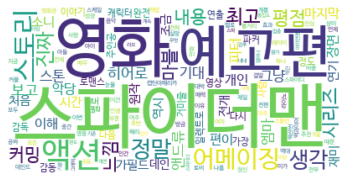

[('영화', 88), ('스파이더맨', 68), ('액션', 37), ('진짜', 30), ('스토리', 27), ('시간', 23), ('실망', 19), ('최악', 19), ('감독', 18), ('평점', 18), ('시리즈', 16), ('마블', 15), ('토비', 15), ('처음', 15), ('정말', 14), ('생각', 14), ('별로', 14), ('그냥', 13), ('어메이징', 13), ('진심', 11), ('보고', 11), ('기대', 11), ('알바', 11), ('레이미', 11), ('악당', 10), ('내용', 10), ('로맨스', 10), ('재미', 9), ('역시', 9), ('하나', 9), ('맥과이어', 8), ('쓰레기', 8), ('멜로', 7), ('보지', 7), ('원작', 7), ('전개', 7), ('느낌', 7), ('수준', 7), ('정도', 6), ('소니', 6), ('판권', 6), ('사람', 6), ('시나리오', 6), ('원래', 6), ('지금', 6), ('개봉', 6), ('이번', 6), ('역대', 6), ('마크', 6), ('개연', 6), ('히어로', 6), ('심리', 5), ('유치', 5), ('중간', 5), ('뭔가', 5), ('노잼', 5), ('보기', 5), ('무슨', 5), ('완전', 5), ('연애', 5), ('이건', 5), ('사랑', 5), ('가지', 5), ('다시', 5), ('어벤져스', 5), ('영상', 5), ('우리', 4), ('하품', 4), ('캡틴아메리카', 4), ('손발', 4), ('만화', 4), ('편도', 4), ('네이버', 4), ('지루함', 4), ('장면', 4), ('주인공', 4), ('가장', 4), ('확인', 4), ('집중', 3), ('피터', 3), ('거지', 3), ('관객', 3), ('거의', 3), ('스케일', 3), ('액션씬', 3), ('오히려', 3),

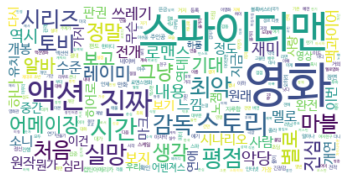

In [58]:
# 아까 가져온 데이터들의 윤곽을 살펴봅니다.
draw_word_cloud_from_reviews([r for r in fetched_reviews if r[1]])
draw_word_cloud_from_reviews([r for r in fetched_reviews if not r[1]])

## 데이터를 살펴보았습니다

### 긍정 리뷰와 부정 리뷰 모두 많이 나오는 단어는 비슷

긍정과 부정 리뷰 모두 빈도수 1위부터 3위까지는 같았습니다:

1. 스파이더맨
2. 영화
3. 액션

### 긍정과 부정을 결정하는 단어는 빈도 수가 적음

다음과 같이 딱 보아도 부정적인 단어는 등장 빈도가 적었습니다:

- 거지
- 하품
- 실망
- 최악

### 긍정 리뷰에도 부정 단어가 들어가 있음

적은 경우이긴 하나, 긍정 리뷰에도 "최악"과 같은 부정 단어가 포함되어 있습니다.

## 나이브 베이즈 분류기 학습시키기

### 학습용 데이터 만들기

문장을 토큰화 시킨 다음에, 존재하는 단어는 `true`, 존재하지 않는 단어는 `false`로 하여, *전체 단어의 수 n*차원의 특징점들을 추출합니다.

추출해낸 feature들에 `pos` 또는 `neg` 레이블을 달아 학습용 데이터를 준비합니다.

### 학습시키기

`nltk.NaiveBayseClassifier.train` 메소드를 사용하면 학습이 완료된 분류기 인스턴스가 나옵니다. >_<

In [72]:
from time import time
from nltk import NaiveBayesClassifier


def extract_all_words(all_reviews: list, tokenizer) -> set:
    """
    모든 리뷰들에 최소 1번 이상 등장한 토큰들을 중복 없이 가져옵니다.
    :param all_reviews: 리뷰들
    :param tokenizer: 토큰화 방법
    :return: 토큰들
    """
    all_words = flatten([tokenizer(review[0]) for review in all_reviews])

    return set(all_words)


def to_features(text: str, all_words: set, tokenizer):
    """
    주어진 텍스트를 feature 셋으로 만들어 반환합니다.
    :param text: 텍스트
    :param all_words: 모든 단어들의 목록
    :param tokenizer: 토큰화 방법
    :return: feature 셋
    """
    tokens = tokenizer(text)
    return {word: (word in tokens) for word in all_words}


def generate_train_data(all_reviews: list, all_words: set, tokenizer) -> list:
    """
    주어진 리뷰들로부터 학습용 데이터를 끄집어냅니다.
    :param all_reviews: 리뷰
    :param all_words: 모든 단어들의 집합
    :param tokenizer: 토큰화 방법
    :return: nltk 나이브 베이즈 분류기에 집어넣기 좋은 형태의 학습 데이터
    """
    all_train_data = []

    start_at = time()

    for review in all_reviews:
        text, positive = review

        features = to_features(text, all_words, tokenizer=tokenizer)
        label = 'pos' if positive else 'neg'

        all_train_data.append((features, label))

    end_at = time()
    print(f"학습 데이터 생성하는 데에 {end_at - start_at}초 걸림")

    return all_train_data


def get_trained_classifier(train_data: list) -> NaiveBayesClassifier:
    """
    나이브 베이즈 분류기를 학습시키고 그 분류기 인스턴스를 반환합니다.
    :param train_data: 학습 데이터
    :return: 학습된 분류기
    """
    start_at = time()

    classifier = NaiveBayesClassifier.train(train_data)

    end_at = time()
    print(f"학습하는 데에 {end_at - start_at}초 걸림")

    return classifier


def classify_max(classifier: NaiveBayesClassifier, text: str, all_words: set, tokenizer) -> bool:
    features = to_features(text, all_words, tokenizer=tokenizer)

    return classifier.classify(features) == 'pos'


def classify(classifier: NaiveBayesClassifier, text: str, all_words: set, tokenizer):
    features = to_features(text, all_words, tokenizer=tokenizer)

    classified = classifier.prob_classify(features)

    return [{sample: classified.prob(sample)} for sample in classified.samples()]

In [61]:
# 중요한 feature들을 알아봅니다.
get_trained_classifier(
    generate_train_data(
        fetched_reviews,
        extract_all_words(fetched_reviews, tokenizer=okt.morphs),
        tokenizer=okt.morphs
    )
).show_most_informative_features()

학습 데이터 생성하는 데에 5.942409038543701초 걸림
학습하는 데에 4.055324077606201초 걸림
Most Informative Features
                     예고편 = True              pos : neg    =     21.2 : 1.0
                    재미없다 = True              neg : pos    =     16.6 : 1.0
                      무슨 = True              neg : pos    =     14.4 : 1.0
                       연 = True              neg : pos    =     12.2 : 1.0
                      유치 = True              neg : pos    =     12.2 : 1.0
                      최악 = True              neg : pos    =     11.8 : 1.0
                      알바 = True              neg : pos    =     10.9 : 1.0
                      비추 = True              neg : pos    =     10.0 : 1.0
                      하품 = True              neg : pos    =     10.0 : 1.0
                       화 = True              neg : pos    =     10.0 : 1.0


## 학습 결과 살펴보기

### 가장 중요한 feature와 해석

**시간**이라는 단어가 등장하면 부정일 확률이 5.4배나 됩니다. 아무래도 영화 리뷰에 시간을 언급한다는건 부정적인 뉘앙스가 강한 것이겠지요..?

어떤 리뷰들이 있는지 살펴보겠습니다.

```python
print('\n'.join([r[0] for r in fetched_reviews if '시간' in r[0]]))
```

- "고통의 **시간**이었다 이걸보고 10점주는걸보니 정말 알바가 있긴하네"
- "상영**시간**은 긴데  어느 이야기 하나 제대로 담지 못했다.    남는건 역겨운 구시대 영웅 만들어 감동 짜내기 뿐샘레이미가 진짜 잘만들었단걸 다시금  느낀다"
- "엉성한 스토리 전개. 쓸데없는 스토리만 한**시간** 반. 스파이더맨 팬으로써 진심으로 조언하는데 영화관에서 보지마세요.. **시간**아깝고 돈 아까워요"

마음이 아프네요...저는 재밌게 봤는데..

## 최종!

### 전체 데이터셋 사용

1000개의 리뷰를 사용합니다.

### 학습 후 테스트 케이스로 검증

400~421번째 페이지에 있는(=학습에 사용되지 않은) 리뷰들을 테스트 케이스로 사용하려고 합니다.

In [64]:
cases = [
    "또보고싶다",
    "시간 가는 줄 모르고 봤네요ㅎㅎ",
    "유튜브에서 맨날 클립 찾아보는 중",
    "댓글 다 알바임? 평점 왜이리높음"
]


def test():
    all_words = extract_all_words(fetched_reviews, tokenizer=okt.morphs)

    train_data = generate_train_data(fetched_reviews, all_words, okt.morphs)

    classifier = get_trained_classifier(train_data)
    classifier.show_most_informative_features()

    for case in cases:
        print(f'원본: {case}')
        print(f'토큰화: {okt.morphs(case)}')
        print(f'분류 결과: {classify(classifier, case, all_words, okt.morphs)}')
        print()


In [68]:
test()

학습 데이터 생성하는 데에 6.340497016906738초 걸림
학습하는 데에 3.5709500312805176초 걸림
Most Informative Features
                     예고편 = True              pos : neg    =     21.2 : 1.0
                    재미없다 = True              neg : pos    =     16.6 : 1.0
                      무슨 = True              neg : pos    =     14.4 : 1.0
                       연 = True              neg : pos    =     12.2 : 1.0
                      유치 = True              neg : pos    =     12.2 : 1.0
                      최악 = True              neg : pos    =     11.8 : 1.0
                      알바 = True              neg : pos    =     10.9 : 1.0
                      비추 = True              neg : pos    =     10.0 : 1.0
                      하품 = True              neg : pos    =     10.0 : 1.0
                       화 = True              neg : pos    =     10.0 : 1.0
원본: 굿이에요 아이가보긴어려웠지만
토큰화: ['굿', '이에요', '아이', '가보긴', '어려웠지만']
분류 결과: [{'pos': 0.999974632995629}, {'neg': 2.5367004372879154e-05}]

원본: 복잡하게 생각안하면 재밌어요!
토큰화: 

## 학습 데이터 1000개로 분류기를 사용해 보았습니다.

Okt를 사용해 명사만 추출하도록 구성하여 테스트를 진행해 보았습니다.

### 생각보다 부정확합니다.

문장 구성이 평이하고, 특정 한 두 단어에 의해 긍정/부정이 갈리는 경우, 원하는 결과가 나오지 않습니다. 테스트 데이터가 적은 탓인듯 싶습니다.

### (당연하지만) 모든 단어의 목록에 포함되지 않은 단어를 사용하면 정확도가 떨어집니다.

모든 단어의 목록이 충분히 커야(=학습 데이터가 충분히 방대해야) 원하는 결과가 나올 듯 합니다.

## 전처리의 중요성

### 데이터가 많아져도 여전히 부정확했음.

리뷰 5000개를 대상으로 테스트 케이스를 검증하여도 부정확하기는 마찬가지였습니다.

### Tokenizer를 교체하니 결과가 크게 바뀜

Okt의 nouns를 nltk의 word_tokenize로 교체하고 학습과 테스트를 진행하니 결과가 크게 바뀌었습니다.

## 어떤 tokenizer가 가장 좋을까?

그렇다면 분류기 성능을 높이기 위해서는 어떤 tokenizer를 사용하는 것이 좋을까요?

### 실험 설계

학습에는 리뷰 1 ~ 100페이지의 내용을 사용합니다.

테스트에는 리뷰 400 ~ 500페이지의 내용을 사용합니다.

테스트 성공률을 tokenizer별로 측정합니다.

In [76]:
test_cases = fetch_all_reviews(range(200, 301))
print(f'검증용 데이터 {len(test_cases)}개 확보!')

range(200, 301)개 페이지 중 200번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 201번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 202번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 203번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 204번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 205번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 206번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 207번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 208번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 209번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 210번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 211번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 212번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 213번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 214번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 215번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 216번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 217번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 218번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 219번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 220번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 221번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 222번째 페이지 스크랩 중...
range(200, 301)개 페이지 중 223번째 페이지 스

In [79]:
from konlpy.tag import Hannanum
from konlpy.tag import Komoran
from konlpy.tag import Kkma
import nltk

nltk.download('punkt')

hannanum = Hannanum()
komoran = Komoran()
kkma = Kkma()

tokenizers = [
    okt.morphs,
    hannanum.morphs,
    komoran.morphs,
    kkma.morphs,
    nltk.tokenize.word_tokenize
]


def test_accuracy():
    for tokenizer in tokenizers:
        score = 0

        all_words = extract_all_words(fetched_reviews, tokenizer=tokenizer)

        train_data = generate_train_data(fetched_reviews, all_words, tokenizer=tokenizer)

        classifier = get_trained_classifier(train_data)

        for text, answer in test_cases:
            result = classify_max(classifier, text, all_words, tokenizer=tokenizer)
            score += 1 if result == answer else 0

        print(f'{tokenizer} {score}/{len(test_cases)}점!\n')

[nltk_data] Downloading package punkt to /Users/potados/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [80]:
test_accuracy()

학습 데이터 생성하는 데에 5.948752164840698초 걸림
학습하는 데에 4.411263942718506초 걸림
<bound method Okt.morphs of <konlpy.tag._okt.Okt object at 0x7f8c3fa090d0>> 858/1010점!

학습 데이터 생성하는 데에 7.270378112792969초 걸림
학습하는 데에 3.1246578693389893초 걸림
<bound method Hannanum.morphs of <konlpy.tag._hannanum.Hannanum object at 0x7f8c585842b0>> 862/1010점!

학습 데이터 생성하는 데에 4.88581395149231초 걸림
학습하는 데에 2.2387590408325195초 걸림
<bound method Komoran.morphs of <konlpy.tag._komoran.Komoran object at 0x7f8c584e1d60>> 840/1010점!

학습 데이터 생성하는 데에 48.06401610374451초 걸림
학습하는 데에 2.235905885696411초 걸림
<bound method Kkma.morphs of <konlpy.tag._kkma.Kkma object at 0x7f8c584e1eb0>> 840/1010점!

학습 데이터 생성하는 데에 4.503077268600464초 걸림
학습하는 데에 4.751805067062378초 걸림
<function word_tokenize at 0x7f8c55f8f9d0> 872/1010점!



## 결론

### Tokenizer는 word_tokenize가 제일 좋습니다.

```
학습 데이터 생성하는 데에 5.948752164840698초 걸림
학습하는 데에 4.411263942718506초 걸림
<bound method Okt.morphs of <konlpy.tag._okt.Okt object at 0x7f8c3fa090d0>> 858/1010점!

학습 데이터 생성하는 데에 7.270378112792969초 걸림
학습하는 데에 3.1246578693389893초 걸림
<bound method Hannanum.morphs of <konlpy.tag._hannanum.Hannanum object at 0x7f8c585842b0>> 862/1010점!

학습 데이터 생성하는 데에 4.88581395149231초 걸림
학습하는 데에 2.2387590408325195초 걸림
<bound method Komoran.morphs of <konlpy.tag._komoran.Komoran object at 0x7f8c584e1d60>> 840/1010점!

학습 데이터 생성하는 데에 48.06401610374451초 걸림
학습하는 데에 2.235905885696411초 걸림
<bound method Kkma.morphs of <konlpy.tag._kkma.Kkma object at 0x7f8c584e1eb0>> 840/1010점!

학습 데이터 생성하는 데에 4.503077268600464초 걸림
학습하는 데에 4.751805067062378초 걸림
<function word_tokenize at 0x7f8c55f8f9d0> 872/1010점!
```

nltk의 word_tokenize가 제일 빠르고 정확했습니다.

### 리뷰 학습 데이터에 잘 등장하지 않은 단어를 사용하면 결과가 부정확합니다.

가령 "히킼ㅋㅋ메롱ㄹㅎ"이라든가, "사각형의내부의사각형의내부의사각형의내부의사각형 의내부의사각형." 같은 텍스트를 테스트 케이스로 사용하면, 거의 모든 feature에 `False`가 들어갈 것입니다.

### 데이터가 좋아야 모델도 좋습니다.

만고불변의 진리인 것 같습니다. 원본 데이터의 품질과 전처리가 좋지 못하면 좋은 예측 모델을 만들기는 요원해 보입니다.